In [20]:
import numpy as np  # linear algebra
import pandas as pd  # dad preprocessing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization

In [13]:
df = pd.read_excel('cv-table.xlsx')  # data loading

In [14]:
df = df.drop(0)
df = df.drop('#', axis=1)
df = df.reset_index(drop=True)
df = df.replace({0: False, 1: True})
df

,Picture,About_Me,Education,Experience,Military_Service,Skills,Languages,GPA,Certifications,Contact_Me,Job_Title,Volunteer_Experience,Achievments,Social_Links,Interests
0,True,True,True,True,False,True,True,True,False,True,True,False,False,True,False
1,False,True,True,True,False,False,True,True,False,True,True,False,False,True,False
2,False,True,True,True,True,False,True,False,False,True,False,False,False,True,False
3,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
4,True,False,True,True,False,False,True,False,True,True,True,False,True,False,False
5,False,True,True,True,True,False,True,True,True,True,False,True,False,False,False
6,True,True,True,True,True,False,True,False,False,True,True,False,False,False,True
7,False,False,True,True,True,True,True,True,True,True,False,True,False,True,False
8,True,True,True,True,True,False,True,False,False,True,False,False,True,True,False
9,False,True,True,True,True,False,False,True,False,True,False,False,False,True,False


In [26]:
# percentage table
df_reqs_percentage = pd.DataFrame(index=df.columns, columns=['True_Count', 'True_Percentage', 'False_Count', 'False_Percentage'])

for col in df.columns:
    true_count = df[col].sum()
    false_count = len(df) - true_count
    
    true_percentage = true_count / len(df) * 100
    false_percentage = false_count / len(df) * 100
    
    df_reqs_percentage.loc[col, 'True_Count'] = true_count
    df_reqs_percentage.loc[col, 'True_Percentage'] = true_percentage
    df_reqs_percentage.loc[col, 'False_Count'] = false_count
    df_reqs_percentage.loc[col, 'False_Percentage'] = false_percentage
    
df_reqs_percentage = df_reqs_percentage.sort_values(by='True_Count', ascending=False)

df_reqs_percentage


,True_Count,True_Percentage,False_Count,False_Percentage
Contact_Me,48,100,0,0
Education,47,97.9167,1,2.08333
Experience,47,97.9167,1,2.08333
About_Me,40,83.3333,8,16.6667
Military_Service,34,70.8333,14,29.1667
Languages,32,66.6667,16,33.3333
Social_Links,23,47.9167,25,52.0833
Skills,22,45.8333,26,54.1667
GPA,22,45.8333,26,54.1667
Job_Title,22,45.8333,26,54.1667


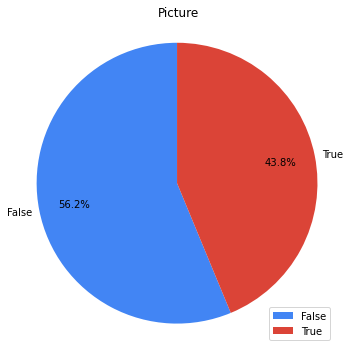

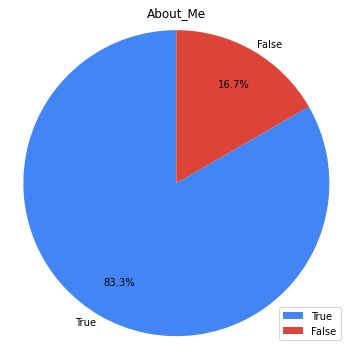

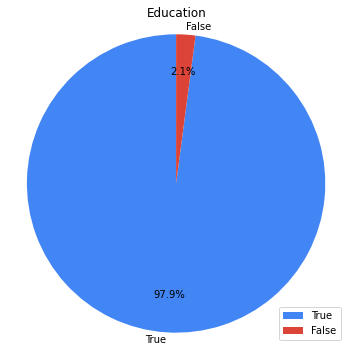

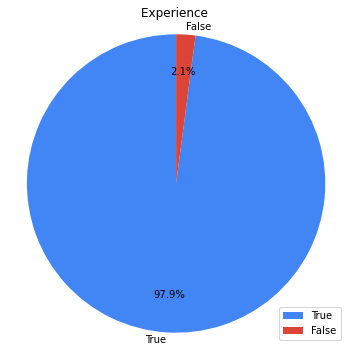

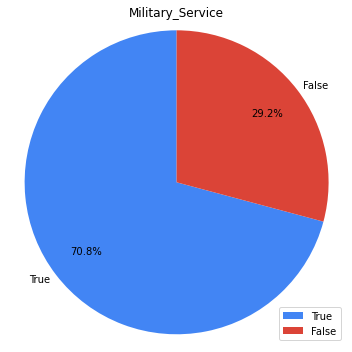

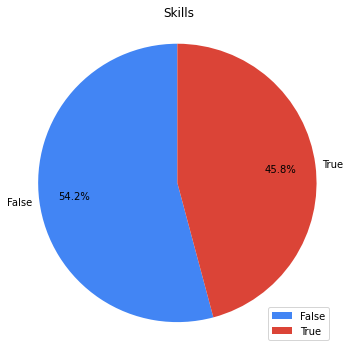

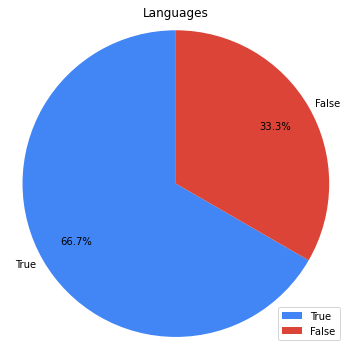

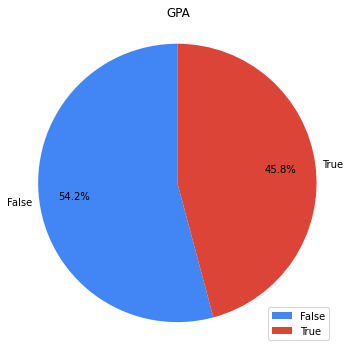

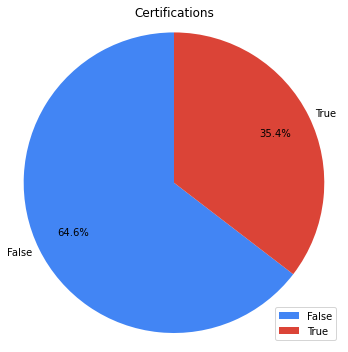

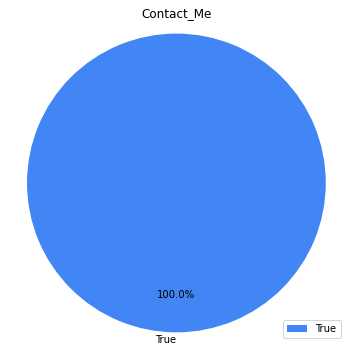

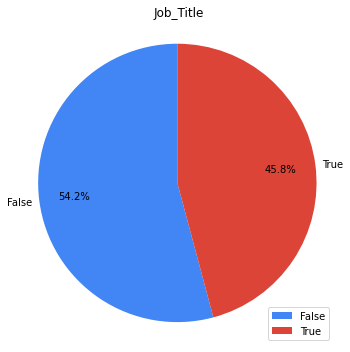

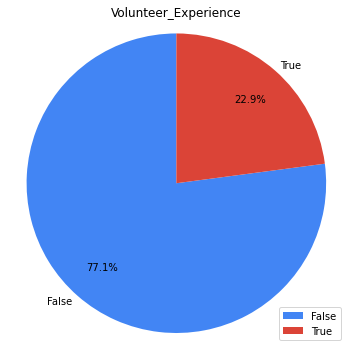

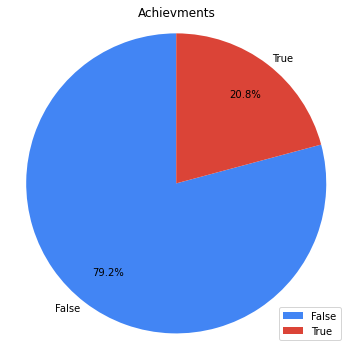

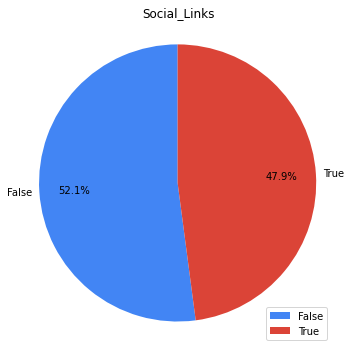

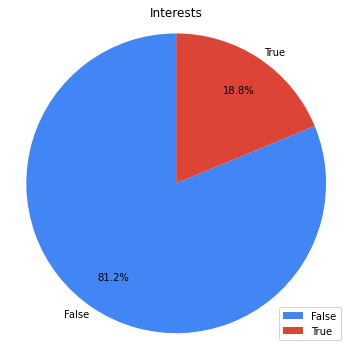

In [24]:
# pie charts
def plot_pie(column):
    counts = column.value_counts()
    labels = counts.index
    sizes = counts.values
    explode = [0] * len(labels)
    colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#AB47BC', '#00ACC1', '#FF7043', '#9E9D24', '#5C6BC0', '#8D6E63']
    fig, ax = plt.subplots(figsize=(5,5))
    ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, pctdistance=0.75, labeldistance=1.05)
    ax.axis('equal')
    ax.set_title(column.name)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

for column in df:
    plot_pie(df[column])